In [60]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import normalize
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = normalize(train_X, axis=1)
test_X = normalize(test_X, axis=1)

In [45]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

# train_X = train_X / 255.0
# train_y = train_y / 255.0
# test_X = test_X / 255.0
# test_y = test_y / 255.0

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [46]:
import numpy as np
import cv2 as cv
import torch
import pandas as pd

%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt
from tensorflow import keras

np.random.seed(42)

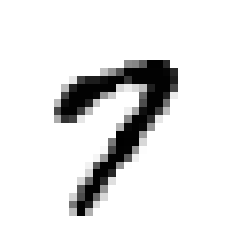

To jest liczba: 7


In [47]:
number = 15
some_digit = train_X[number]
plt.imshow(some_digit, cmap='binary')
plt.axis('off')
plt.show()
print("To jest liczba:", train_y[number])

In [61]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [62]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [63]:
hist = model.fit(train_X, train_y, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 1s 724us/step - loss: 0.2640 - accuracy: 0.9218
Epoch 2/30
1875/1875 [==============================] - 1s 695us/step - loss: 0.1086 - accuracy: 0.9659
Epoch 3/30
1875/1875 [==============================] - 1s 724us/step - loss: 0.0740 - accuracy: 0.9769
Epoch 4/30
1875/1875 [==============================] - 1s 710us/step - loss: 0.0529 - accuracy: 0.9832
Epoch 5/30
1875/1875 [==============================] - 1s 752us/step - loss: 0.0413 - accuracy: 0.9866
Epoch 6/30
1875/1875 [==============================] - 1s 781us/step - loss: 0.0311 - accuracy: 0.9898
Epoch 7/30
1875/1875 [==============================] - 1s 763us/step - loss: 0.0253 - accuracy: 0.9915
Epoch 8/30
1875/1875 [==============================] - 1s 741us/step - loss: 0.0201 - accuracy: 0.9928
Epoch 9/30
1875/1875 [==============================] - 1s 772us/step - loss: 0.0183 - accuracy: 0.9938
Epoch 10/30
1875/1875 [==============================] - 1s 759u

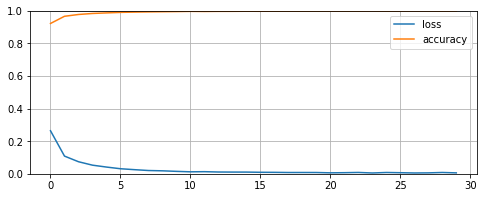

In [64]:
pd.DataFrame(hist.history).plot(figsize=(8, 3))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [65]:
model.evaluate(test_X, test_y)

313/313 [==============================] - 0s 467us/step - loss: 0.1717 - accuracy: 0.9766


[0.17174525558948517, 0.9765999913215637]

In [67]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets


In [ ]:
test = model.predict(train_X[:16])
train_y[:16]

In [ ]:
test.round(2)

In [ ]:
test = np.argmax(test, axis=1)

In [ ]:
test

In [ ]:
image = cv.imread('number.png', cv.IMREAD_GRAYSCALE)
image = image[0:784, 0:784]

In [ ]:
plt.imshow(image, cmap='binary')
plt.show()

In [ ]:
image = cv.resize(image, (28, 28))

In [ ]:
plt.imshow(image, cmap='binary')
plt.show()

In [ ]:
image = np.expand_dims(image, axis=0)
ex = model.predict(image)
ex = np.argmax(ex, axis=1)
ex